# Outlier Detection 

In [ ]:
# =============== This code detects outliers in selected features using the IQR method and reports how many outliers each feature has======================
import pandas as pd
import numpy as np

df = pd.read_csv("/kaggle/input/3w-dataset-500k-sample/Final_Balanced_Sample_500k.csv")

features = ['P-PDG', 'T-TPT', 'P-TPT', 'T-JUS-CKP', 'P-MON-CKP']

outlier_info = {}

for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_info[col] = {
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "outliers_count": outliers.shape[0]
    }

for k, v in outlier_info.items():
    print(f"{k}: {v['outliers_count']} outliers")


P-PDG: 7917 outliers
T-TPT: 0 outliers
P-TPT: 3484 outliers
T-JUS-CKP: 18 outliers
P-MON-CKP: 29223 outliers


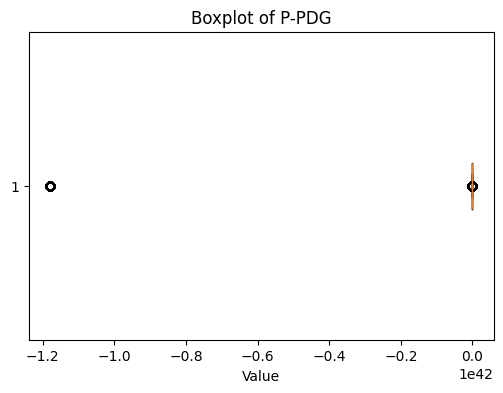

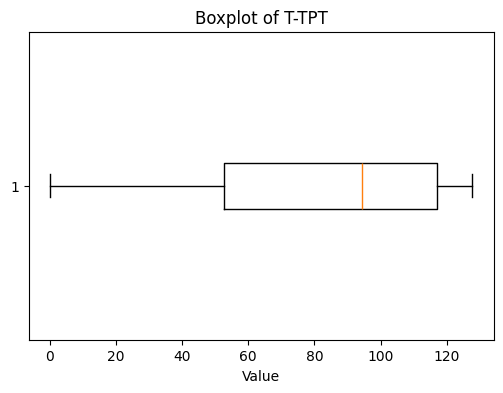

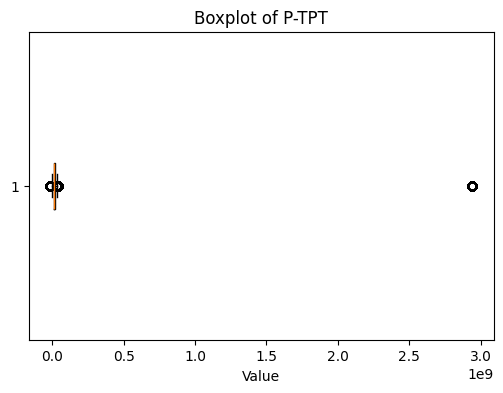

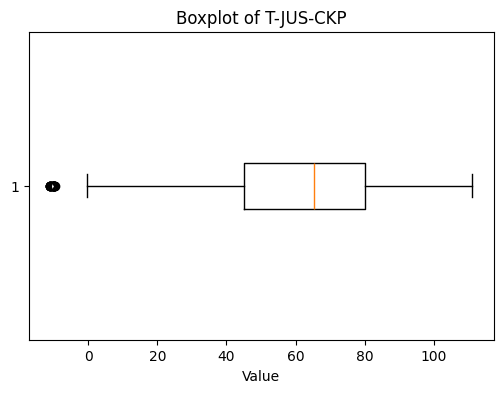

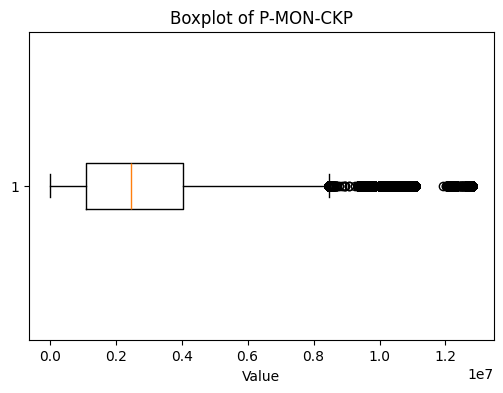

In [ ]:
# ==================== This code visualizes the distribution of selected features using boxplots to help identify outliers====================

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/3w-dataset-500k-sample/Final_Balanced_Sample_500k.csv")

features = ['P-PDG', 'T-TPT', 'P-TPT', 'T-JUS-CKP', 'P-MON-CKP']

for col in features:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel("Value")
    plt.show()


# Feature-wise Outlier Handling

In [ ]:
# read data
import pandas as pd
import numpy as np

df = pd.read_csv("/kaggle/input/3w-dataset-500k-sample/Final_Balanced_Sample_500k.csv")

In [ ]:
"""
Outliers in 'P-PDG' were handled using the IQR clipping method, where values outside the lower
and upper bounds are limited instead of removed to keep all data while reducing extreme noise.
"""
Q1 = df['P-PDG'].quantile(0.25)
Q3 = df['P-PDG'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['P-PDG'] = df['P-PDG'].clip(lower, upper)

In [ ]:
"""
Outliers and skewness in 'P-TPT' were handled using log transformation after clipping negative
values, which reduces the effect of large values while keeping the feature distribution stable.
"""
df['P-TPT'] = df['P-TPT'].clip(lower=0)

df['P-TPT'] = np.log1p(df['P-TPT'])


In [ ]:
"""
Outliers in 'T-JUS-CKP' were handled using IQR-based filtering by removing values outside
the normal range to improve data quality and reduce extreme noise before training.
"""
Q1 = df['T-JUS-CKP'].quantile(0.25)
Q3 = df['T-JUS-CKP'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['T-JUS-CKP'] >= lower) & (df['T-JUS-CKP'] <= upper)]


In [ ]:
"""
Outliers in 'P-MON-CKP' were handled using IQR clipping to limit extreme values
without removing rows, helping keep the dataset size while reducing noise.
"""
Q1 = df['P-MON-CKP'].quantile(0.25)
Q3 = df['P-MON-CKP'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['P-MON-CKP'] = df['P-MON-CKP'].clip(lower, upper)

In [ ]:
# =========== save new cleaned version frpm data ==========================
df.to_csv("Clean_3w_dataset.csv", index=False)

In [ ]:
# ====================== show sample ===================
import pandas as pd
import numpy as np

df = pd.read_csv("/kaggle/working/Clean_3w_dataset.csv")
df.head(10)

,P-PDG,T-TPT,P-TPT,T-JUS-CKP,P-MON-CKP,class
0,0.000000e+00,105.951300,16.010428,55.086520,3.917717e+06,0
1,0.000000e+00,106.563300,16.599693,70.140440,8.459646e+06,4
2,2.027480e+07,95.239952,16.325320,75.444036,2.089152e+06,101
3,3.863401e+07,15.273849,16.036132,85.329098,4.003604e+06,102
4,1.640136e+07,91.252602,15.844723,73.597995,1.102863e+06,109
5,1.877589e+07,58.936320,16.116182,40.078020,2.070316e+06,109
6,0.000000e+00,106.549500,16.599563,70.633380,8.459646e+06,4
7,1.945232e+07,97.043951,16.009725,75.992041,1.030719e+06,109
8,1.810502e+07,99.547785,16.176543,67.330008,4.090330e+06,3
9,3.345710e+07,6.292082,16.102539,57.923219,4.002463e+06,102


# Machine Learning Section

In [10]:
# Import needed Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier

# 1. Apply Random Forest Algorithm

In [11]:
# load dataset 
df = pd.read_csv("/kaggle/working/Clean_3w_dataset.csv")
df.shape

(443627, 6)

In [12]:
# Features & Target Split
X = df.drop(columns=['class'])
y = df['class']
X.shape, y.shape

((443627, 5), (443627,))

In [13]:
# Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((354901, 5), (88726, 5))

In [14]:
# Random Forest Model Initialization & Model Training
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42,
    class_weight="balanced"
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [15]:
# Predictions & Accuracy
rf_y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, rf_y_pred)
accuracy

0.9901719901719902

In [16]:
# Classification Report 
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5880
           1       0.98      0.99      0.98      5882
           2       1.00      1.00      1.00      5882
           3       1.00      1.00      1.00      5882
           4       0.98      1.00      0.99      5883
           5       0.99      0.99      0.99      5882
           6       0.99      1.00      1.00       116
           7       1.00      1.00      1.00      5882
           8       0.99      1.00      1.00      5883
           9       0.99      0.99      0.99      5882
         101       0.99      0.98      0.98      5882
         102       1.00      1.00      1.00      5882
         105       0.99      0.99      0.99      5882
         106       0.99      1.00      1.00       381
         107       0.98      0.99      0.99      5882
         108       1.00      0.99      1.00      5882
         109       0.99      0.98      0.99      5881

    accuracy              

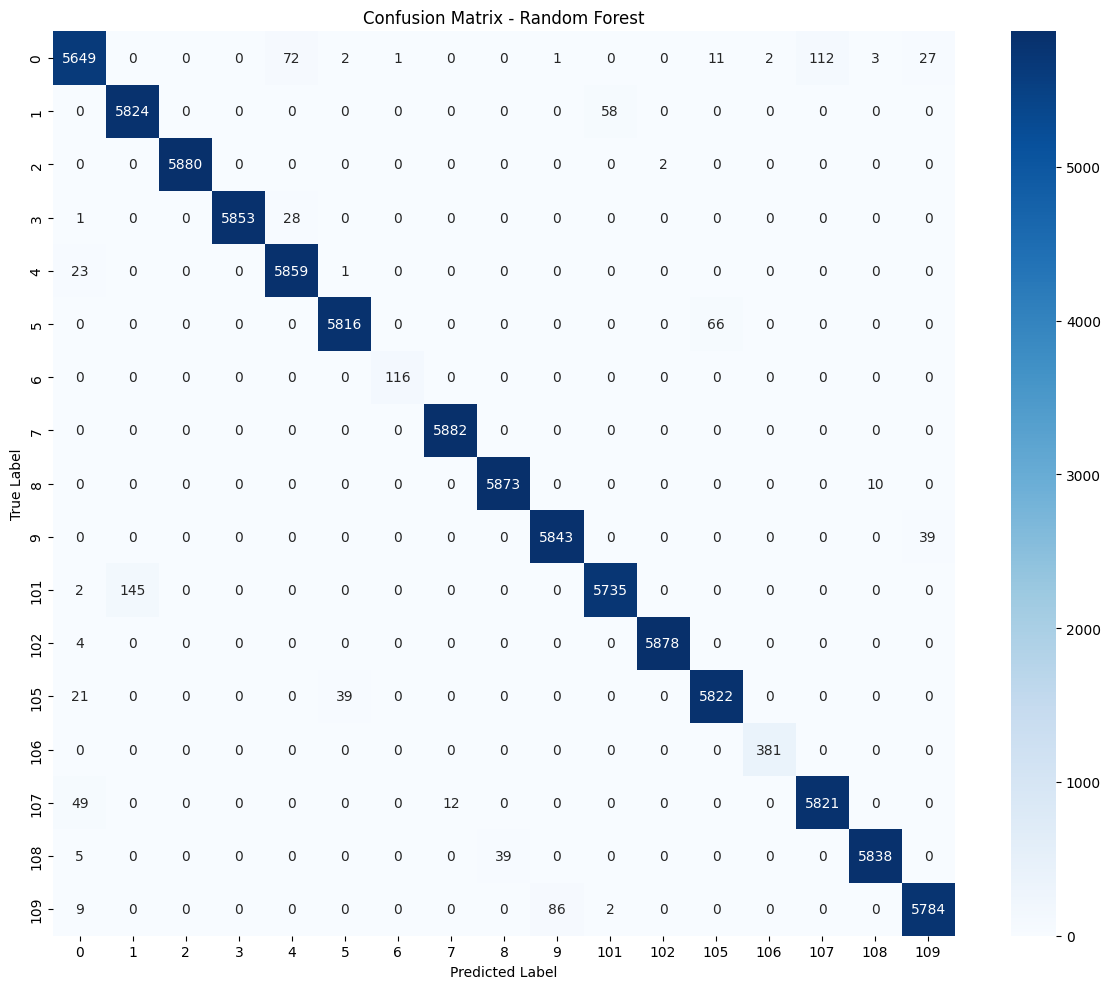

In [17]:
# Confusion Matrix
cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(12, 10)) 
sns.heatmap(
    cm,
    annot=True,          
    fmt="d",             
    cmap="Blues",
    xticklabels=np.unique(y_test),
    yticklabels=np.unique(y_test)
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()

# 2. Apply Support Vector Machine (SVM)

In [18]:
# Pipeline: Scaling + SVM
svm_model = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("svm", SVC(
        kernel="rbf",
        C=1.0,
        gamma="scale",
        decision_function_shape="ovr",
        class_weight="balanced",
        random_state=42
    ))
])

# Training
svm_model.fit(X_train, y_train)

# Prediction
y_pred_svm = svm_model.predict(X_test)

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.8464598877442914


In [19]:
# Classification Report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.95      0.45      0.61      5880
           1       0.86      0.65      0.74      5882
           2       1.00      0.97      0.99      5882
           3       0.98      0.96      0.97      5882
           4       0.85      1.00      0.92      5883
           5       0.66      0.64      0.65      5882
           6       0.25      0.71      0.36       116
           7       0.81      0.98      0.88      5882
           8       0.93      0.98      0.96      5883
           9       0.98      0.90      0.94      5882
         101       0.65      0.90      0.75      5882
         102       0.97      0.97      0.97      5882
         105       0.64      0.63      0.64      5882
         106       0.78      0.34      0.48       381
         107       0.87      0.82      0.84      5882
         108       0.87      0.93      0.90      5882
         109       0.85      0.96      0.90      5881

    accuracy              

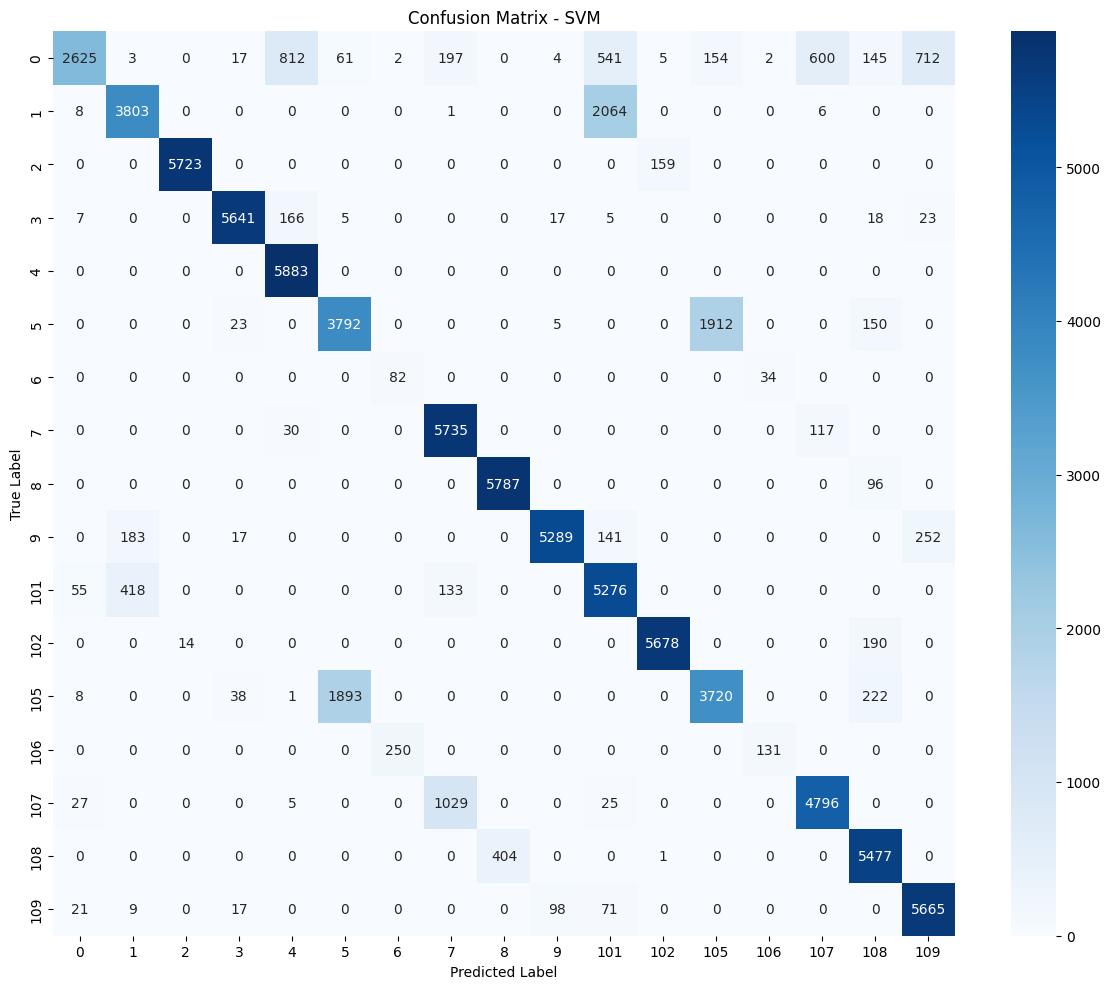

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(12, 10)) 
sns.heatmap(
    cm,
    annot=True,          
    fmt="d",             
    cmap="Blues",
    xticklabels=np.unique(y_test),
    yticklabels=np.unique(y_test)
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.tight_layout()
plt.show()

# Apply Decision Tree

In [21]:
# Model initialization
dt_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight="balanced",
    random_state=42
)

# Training
dt_model.fit(X_train, y_train)

# Prediction
y_pred_dt = dt_model.predict(X_test)

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.9852016319906228


In [22]:
# Classification Report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5880
           1       0.97      0.98      0.97      5882
           2       1.00      1.00      1.00      5882
           3       1.00      0.99      1.00      5882
           4       0.98      0.99      0.99      5883
           5       0.98      0.98      0.98      5882
           6       1.00      1.00      1.00       116
           7       1.00      1.00      1.00      5882
           8       0.99      0.99      0.99      5883
           9       0.98      0.99      0.98      5882
         101       0.98      0.97      0.97      5882
         102       1.00      1.00      1.00      5882
         105       0.98      0.98      0.98      5882
         106       0.99      1.00      1.00       381
         107       0.98      0.98      0.98      5882
         108       0.99      0.99      0.99      5882
         109       0.98      0.98      0.98      5881

    accuracy              

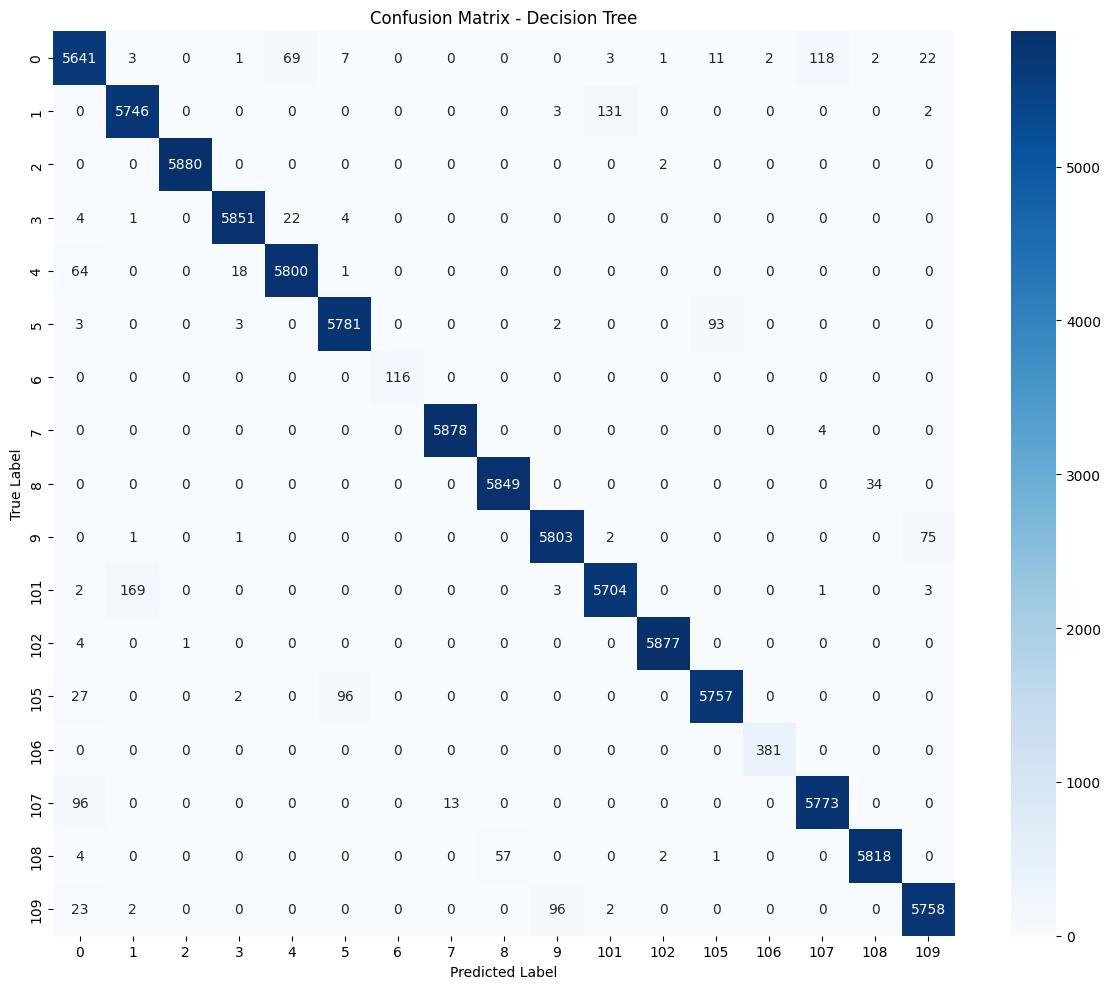

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(12, 10)) 
sns.heatmap(
    cm,
    annot=True,          
    fmt="d",             
    cmap="Blues",
    xticklabels=np.unique(y_test),
    yticklabels=np.unique(y_test)
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.tight_layout()
plt.show()

# Save Models

In [24]:
import joblib

joblib.dump(rf_model, "random_forest_model.joblib")
rf_model = joblib.load("random_forest_model.joblib")

In [25]:
joblib.dump(dt_model, "decision_tree_model.joblib")
dt_model = joblib.load("decision_tree_model.joblib")

In [26]:
joblib.dump(svm_model, "svm_pipeline_model.joblib")
svm_model = joblib.load("svm_pipeline_model.joblib")